# Convert from Vector to Raster

*Written by Men Vuthy, 2022*

---

### Dataset

- Vector: H30植物群落.shp
- Reference raster: kano_20180429_wgs84.tiff


<img src="img-markdown/image-3.png" width="45%">
<img src="img-markdown/image-4.png" width="45%">

### Import necessary modules

In [ ]:
!pip install rasterio
!pip install geopandas

In [2]:
import os
import numpy as np
import rasterio
from rasterio.features import rasterize
from rasterio.transform import from_bounds
import geopandas as gpd
import matplotlib.pyplot as plt

*Mount drive*

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
cd /content/drive/MyDrive/Colab Notebooks/Z. Other topics/Convert shapefile to raster

/content/drive/MyDrive/Colab Notebooks/Z. Other topics/Convert shapefile to raster


### Load dataset

In [5]:
# Load raster image for reference
image_ref = rasterio.open('data/kano_20180429_wgs84.tiff')

# Load survey data shapefile or json file
geo_survey = gpd.read_file('data/水国/H30植物群落.shp').to_crs(image_ref.crs)

In [6]:
geo_survey

,Id,code,area_ha,基本分類,基本分類No,群落コード,群落表示コ,群落名,lyr_code,調査管理番,河川コード,調査年度,調査回,調査年月日,表示用,geometry
0,0,02,0.042844,沈水植物群落,1,1003,013,ホザキノフサモ群落,WA8312,R2018_85_11350_3_U29358,9-85-501-001-000-2,2018,1,20181105,None,"POLYGON ((138.93902 35.05341, 138.93902 35.053..."
1,0,02,0.015477,沈水植物群落,1,1003,013,ホザキノフサモ群落,WA8312,R2018_85_11350_3_U29358,9-85-501-001-000-2,2018,1,20181105,None,"POLYGON ((138.93657 35.06657, 138.93655 35.066..."
2,0,02,0.013277,沈水植物群落,1,1003,013,ホザキノフサモ群落,WA8312,R2018_85_11350_3_U29358,9-85-501-001-000-2,2018,1,20181105,None,"POLYGON ((138.93926 35.05376, 138.93923 35.053..."
3,0,02,0.024026,沈水植物群落,1,1003,013,ホザキノフサモ群落,WA8312,R2018_85_11350_3_U29358,9-85-501-001-000-2,2018,1,20181105,None,"POLYGON ((138.93913 35.05392, 138.93914 35.053..."
4,0,02,0.062657,沈水植物群落,1,1003,013,ホザキノフサモ群落,WA8312,R2018_85_11350_3_U29358,9-85-501-001-000-2,2018,1,20181105,None,"POLYGON ((138.93623 35.06915, 138.93621 35.069..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,0,79,0.009195,開放水面,28,28000,28,開放水面,WA8312,R2018_85_11350_3_U29358,9-85-501-001-000-2,2018,1,20181105,None,"POLYGON ((138.95272 34.98724, 138.95272 34.987..."
3189,0,79,0.016298,開放水面,28,28000,28,開放水面,WA8312,R2018_85_11350_3_U29358,9-85-501-001-000-2,2018,1,20181105,None,"POLYGON ((138.94891 34.98141, 138.94895 34.981..."
3190,0,82,0.011413,ヤナギ高木林,12,12008,128,ジャヤナギ−アカメヤナギ群集（低木林）,WA8312,R2018_85_11350_3_U29358,9-85-501-001-000-2,2018,1,20181105,ヤナギ,"POLYGON ((138.93614 35.06527, 138.93615 35.065..."
3191,0,76,0.078064,人工構造物,26,28000,262,コンクリート構造物,WA8312,R2018_85_11350_3_U29358,9-85-501-001-000-2,2018,1,20181105,None,"POLYGON ((138.90882 35.08336, 138.90879 35.083..."


### Parameter Setting

Select the column to write vector value into pixel

In [7]:
# Define parameters
label_column = '基本分類No'

### Convert from Vector to Raster

In [8]:
# Project the survey geo into same CRS as the reference image
geodata = geo_survey.to_crs(crs=image_ref.crs)

# Convert vector to raster
shape = image_ref.shape
transform = image_ref.transform
rasterize_array = rasterize(
    [(shape, label) for shape, label in zip(geodata['geometry'], geodata[label_column])],
    out_shape=shape,
    transform=transform,
    fill=0,
    all_touched=True,
    dtype=rasterio.float32) 

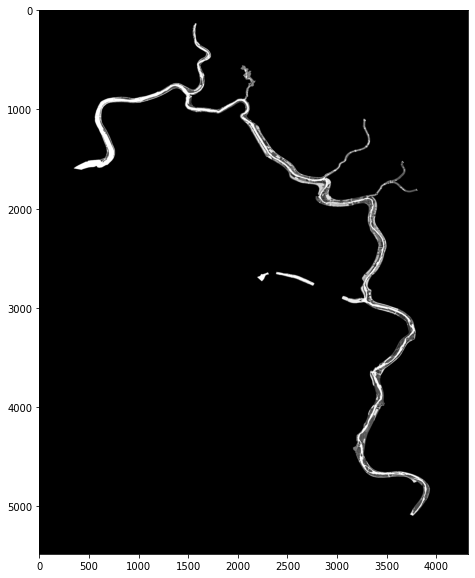

In [9]:
# Plot rasterized shape
plt.figure(figsize=(8,10))
plt.imshow(rasterize_array, 'gray')
plt.show();

In [10]:
# Write rasterized array to image (.tif)
with rasterio.open(
    'rasterized-results.tif', 'w',
    driver='GTiff',
    dtype=rasterio.float32,
    nodata=0,
    count=1,
    width=rasterize_array.shape[1],
    height=rasterize_array.shape[0],
    transform=transform,
    crs=image_ref.crs
) as dst:
    dst.write(rasterize_array, indexes=1)